# 🔍 DWSIM Orange Juice Example

**Created by: Prof. Nicolas Spogis, Ph.D.**  
Phone/WhatsApp: +55 (19) 99844-0460  
Email: nicolas.spogis@gmail.com | nicolas.spogis@ai4tech.ai  
LinkTree: [https://linktr.ee/Ai4Tech](https://linktr.ee/Ai4Tech)

In [16]:
# remove the following two lines to run on linux
import pythoncom
pythoncom.CoInitialize()

from opyrability import multimodel_rep, OI_eval
import numpy as np
import matplotlib.pyplot as plt

In [17]:
########################################################################################################################
# Call DWSIM DLLs
########################################################################################################################
import clr

# Change your DWSIM installation path

In [18]:
dwsimpath = "C:\\Users\\nicol\\AppData\\Local\\DWSIM\\" 

In [19]:
clr.AddReference(dwsimpath + "\\CapeOpen.dll")
clr.AddReference(dwsimpath + "\\DWSIM.Automation.dll")
clr.AddReference(dwsimpath + "\\DWSIM.Interfaces.dll")
clr.AddReference(dwsimpath + "\\DWSIM.GlobalSettings.dll")
clr.AddReference(dwsimpath + "\\DWSIM.SharedClasses.dll")
clr.AddReference(dwsimpath + "\\DWSIM.Thermodynamics.dll")
clr.AddReference(dwsimpath + "\\DWSIM.UnitOperations.dll")
clr.AddReference(dwsimpath + "\\DWSIM.Inspector.dll")
clr.AddReference(dwsimpath + "\\System.Buffers.dll")
clr.AddReference(dwsimpath + "\\DWSIM.Thermodynamics.ThermoC.dll")

In [20]:
########################################################################################################################
# Open DWSIM Automation
########################################################################################################################
def open_DWSIM(dwsimpath, FlowsheetFile):
    from DWSIM.Automation import Automation3
    manager = Automation3()
    myflowsheet = manager.LoadFlowsheet(FlowsheetFile)
    return manager, myflowsheet

In [21]:
########################################################################################################################
# Open DWSIM Automation
########################################################################################################################
FlowsheetFile = "Orange Juice Concentration.dwxmz"
manager, myflowsheet = open_DWSIM(dwsimpath, FlowsheetFile)

In [22]:
########################################################################################################################
# Call DWSIM -> Change Input Parameters -> Solve - Get Output Parameters
########################################################################################################################
case = 0
def opyrability_model(AIS):
    global manager, myflowsheet
    global case
    # Set Input Parameter
    su = myflowsheet.FlowsheetOptions.SelectedUnitSystem
    evaporator = myflowsheet.GetFlowsheetSimulationObject('V-1').GetAsObject()
    evaporator.FlashTemperature =AIS[0] + 273.15
    evaporator.FlashPressure= AIS[1]*100000

    # Request a calculation
    errors = manager.CalculateFlowsheet4(myflowsheet)

    obj = myflowsheet.GetFlowsheetSimulationObject('Water Steam 5bar')
    stream = obj.GetAsObject()
    Steam_Mass_Flow = stream.GetMassFlow() * 3600  # Mass Flow in kg/h

    obj = myflowsheet.GetFlowsheetSimulationObject('MSTR-003')
    stream = obj.GetAsObject()
    Fructose = stream.GetPhase('Overall').Compounds['Fructose'].MassFraction

    print(f'Case {case} simulated!')
    case+=1
    result = np.array([Steam_Mass_Flow, Fructose])
    return result

In [23]:
########################################################################################################################
# Run One Case to Test
########################################################################################################################
results = opyrability_model([80, 0.35])             #80 Celcius + 0.41 bar
print(f"Steam Mass Flow = {results[0]:.2f} m3/h")
print(f"Fructose Mass Fraction = {results[1]:.3f}")

Case 0 simulated!
Steam Mass Flow = 779.85 m3/h
Fructose Mass Fraction = 0.780


Case 1 simulated!
Case 2 simulated!
Case 3 simulated!
Case 4 simulated!
Case 5 simulated!
Case 6 simulated!
Case 7 simulated!
Case 8 simulated!
Case 9 simulated!
Case 10 simulated!
Case 11 simulated!
Case 12 simulated!
Case 13 simulated!
Case 14 simulated!
Case 15 simulated!
Case 16 simulated!
Case 17 simulated!
Case 18 simulated!
Case 19 simulated!
Case 20 simulated!
Case 21 simulated!
Case 22 simulated!
Case 23 simulated!
Case 24 simulated!
Case 25 simulated!
Case 26 simulated!


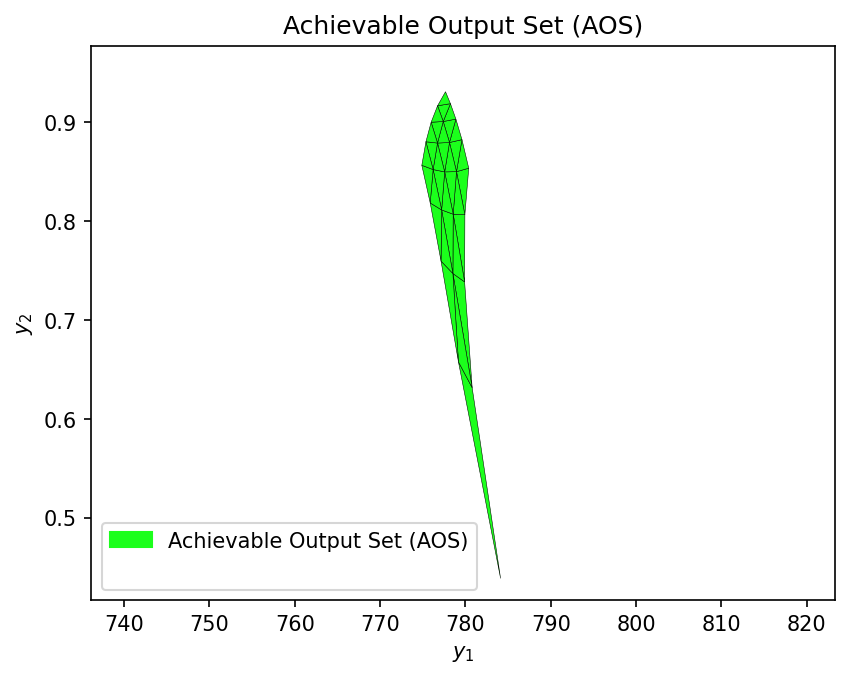

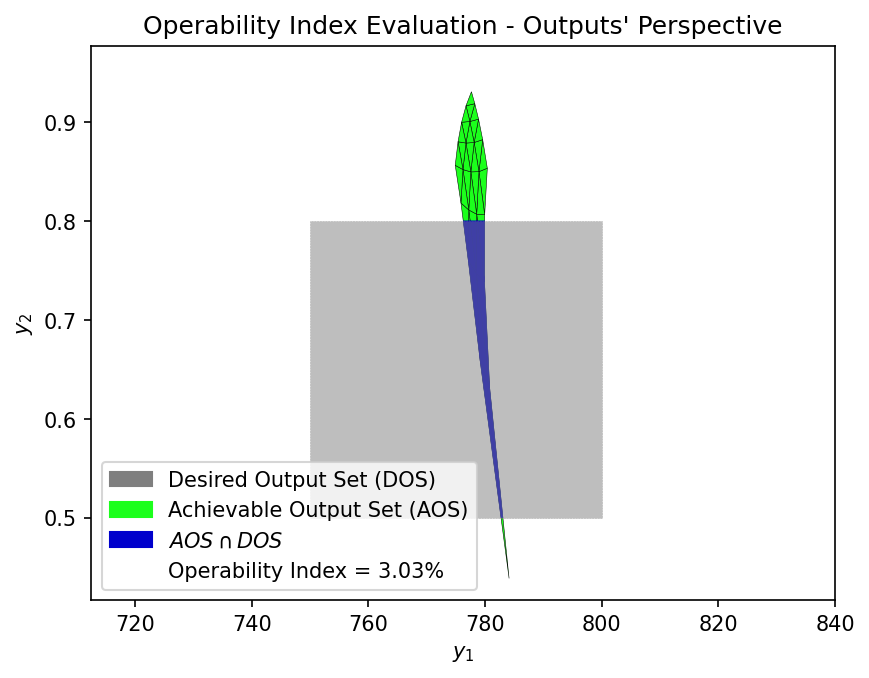

In [24]:
########################################################################################################################
# Defining the AIS and DOS Bounds
########################################################################################################################
DOS_bounds =  np.array([[750, 800],
                        [0.5, 0.8]])

AIS_bounds =  np.array([[80, 90],
                        [0.30, 0.44]])

AIS_resolution =  [5, 5]

AOS_region = multimodel_rep(opyrability_model, AIS_bounds, AIS_resolution, plot=True)

OI = OI_eval(AOS_region, DOS_bounds, plot=True)